### Optimisation of a Bioprocess with Multifidelity Bayesian Optimisation


#### Hackathon Breif
This hackathon involves the optimisation of a simulated bioprocess at process scale utilising CHO cells to produce a desired protein. Experimentally, this would involve a resource-intensive screening campaign involving the growth and feeding of cells under precise conditions (temperature, pH, feed amount, fidelity, etc.) to maximize the production of a desired product. This hackathon offers a simulated method of mapping bioprocess input parameters to a final predicted titre concentration: a measure of cell productivity. The simulations are based on various kinetic parameters which are unique to the type of cells used. For the final scoring, a different set of cell kinetic parameters will be used to evaluate your algorithm.

#### Inputs and Outputs
Inputs to the bioprocess includes 5 vairables: the temperature [°C], pH and the concentration of feed [mM] at 3 different timepoints over 150 minutes. The output is the concentration of the titre (desired product) [g/L]. The goal is to obtain the input variables that correspond to the highest obtained titre.

The bounds of the inputs are as follows:

```
temperature [°C]               -> 30 - 40
pH                             -> 6 - 8
first feed concentration [mM]  -> 0 - 50
second feed concentration [mM] -> 0 - 50
third feed concentration [mM]  -> 0 - 50
```

#### Fidelities and Running the simulation
The simulations can be perfomed at 3 levels of fidelities with an associated accuracy and costs. These fidelities corresponds to a different reactor type and scale used.

```
Lowest fideility: 3L reactor with 1 feeding timepoint at 60 mins.
Realtive cost: 10
Remarks: The feeding concentration is taken as the second feed concentration. Lowest accuracy, but also lowest cost.

Middle fidelity: 3L reactor with 3 feeding timepoints at 40, 80, 120 mins.
Relative cost: 575
Remarks: -

Highest fidelity: 15L reactor with 3 feeding timepoints at 40, 80, 120 mins.
Relative cost: 2100
Remarks: Highest accuracy but high cost.
```

To run an experiment, one can use the `conduct_experiment(X)` function -> this is your objective function. The inputs to this function is a matrix of shape (N, 6) where N is the number of data points and 6 refers to the total number of variables in the following order: `[temperature, pH, feed1, feed2, feed3, fidelity]`. The fidelities are refered to as integers where `0` corresponds to the lowest fidelity, `1` with the middle and `2` with the highest fidelity. An example is shown below.

``` python
import numpy as np
def obj_func(X):
	return (-np.array(conduct_experiment(X))) #negative placed if optimisation performed is minimisation

X_initial = np.array([[33, 6.25, 10, 20, 20, 0],
                      [38, 8, 20, 10, 20, 0]])
Y_initial = conduct_experiment(X_initial)
print(Y_initial)
```

#### Goal and Submission
Your goal is to develop a Bayesian Optimisation class to obtain the set of inputs which **maximizes the titre at the highest fideility**. You have a **budget of 15000** (observe the cost of running each fidelity) and starting with a maximum of 7 training points that is not a part of the budget. (Remember, you have to have at least 2 points for each variable for the covariance matrix to be calculated.)

Please submit your BO class (and GP class) along with the execution block as a .py file to the instructor. A different cell type (with different simulation parameters and maxima) will be used for scoring.

This hackathon will be scored based on maximum titre concentration obtained at the highest fidelity. You must stay within the allocated budget! This will be checked, and if exceeded, your submission will be disqualified!

#### Form of the BO class and execution block
You are allowed to write your own BO class or make modifications to any of the previously seen BO classes.

You must include the attributes `self.X` and `self.Y` corresponding to all of your evaluated inputs and outputs as this will be used to retrive the information used for scoring.

```python
#submission should look something like the following
class GP: #if you have any separate classes other than the BO class
    def __init__(self, ...):
        ...
#BO class
class BO:
    def __init__(self, ...):
        self.X = #training data which the evaluated data is to be appended
        self.Y = #evaluated via the objective function using self.X

# BO Execution Block
X_training = [...]
X_seachspace = [...]

BO_m = BO(...)
```

#### Guidance (Intermediate - Multi-batch Bayesian Optimsation)
You can construct a single-sequential or batch BO algorithm to perform the optimisation. The lowest fidelity experiments do not offer accurate outcomes and you have to choose how many number of expeirments for each fidelity to be performed such that you do not exceed your allocated budget. To link between each fideility, one could perform optimisation on the lower fidilities and then translate the best input conditions to run the highest fidelity experiment.

#### Guidance (Advanced - Multi-fidelity Bayesian Optimisation)
You can develop a multi-fidelity Bayesian Optimisation algorithm to perform the optimisation. Since the score is based on the highest titre concentration of the highest fidelity, it might be beneficial if you constrain (at least) the last experiment to be run with the highest fidelity - this mitigates the risk that your algorithm does not perform any experiments with the highest fidelity. A basic MFBO algorithm could be created by modifying the acquisition function to one that is cost aware. For example: we have previously used Lower Confidence Bound to balance exploration and exploitation of the search space (see notebook section C). To make this cost aware, we can scale the values obtained from LCB by the cost.

```python
    def MF_lower_confidence_bound(...):
        lower_std = Ysearchspace_mean - acquisition_hyperparam[0]*np.sqrt(Ysearchspace_std)
        # mf_lower_std = lower_std / assocated cost for each simulation
        return (X_searchspace[np.argmin(mf_lower_std)])
```

#### Feedback and Scoring Example
Once your algorithm is submitted to the instructor, you can request for some feedback on the performance of your algorithm. The final score will be calculated based on the maximum titre concentration obtained from the highest fidelity. 3 plots will be produced to showcase the performance of your algorithm and the performance against the cohort. Example:

![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)

#### Package Imports

Packages are limited to the the ones listed in the package cell - Talk to one of the intructors to ask if it is possible to import other packages

In [1]:
# if using google collab, run the following pip installs!
!pip install sobol_seq
!pip install plotly
!pip install gpytorch
!pip install rdkit
!pip install botorch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import plotly.graph_objs as go
from scipy.integrate import quad
from scipy.spatial.distance import cdist
from scipy.optimize import minimize, differential_evolution, NonlinearConstraint
from sklearn.decomposition import PCA
import math
import time
import sobol_seq
import torch
import gpytorch
import copy
import numpy as np

In [3]:
import pandas as pd
reactor_list = ["3LBATCH", "3LCONTBATCH", "15LCONTBATCH"]
process_parameters = {
    "3LBATCH": {
        "celltype_1": {"my_max": 0.035, "K_lysis": 4e-2,   "k": [1e-3, 1e-2, 1e-2],          "K": [150, 40, 1, 0.22],    "Y": [9.23e7, 8.8e8, 1.6, 0.68, 6.2292e-8, 4.41e-6],    "m": [8e-13, 3e-12], "A": 1e1, "pH_opt": 7.2, "E_a": 32},

    },
    "3LCONTBATCH": {
        "celltype_1": {"my_max": 0.035, "K_lysis": 4e-2,   "k": [1e-3, 1e-2, 1e-2],          "K": [150, 40, 1, 0.22],    "Y": [9.23e7, 8.8e8, 1.6, 0.68, 6.2292e-8, 4.41e-6],    "m": [8e-13, 3e-12], "A": 1e1, "pH_opt": 7.2, "E_a": 32},

    },
    "15LCONTBATCH": {
        "celltype_1": {"my_max": 0.035, "K_lysis": 4e-2,   "k": [1e-3, 1e-2, 1e-2],          "K": [150, 40, 1, 0.22],    "Y": [9.23e7, 8.8e8, 1.6, 0.68, 6.2292e-8, 4.41e-6],    "m": [8e-13, 3e-12], "A": 1e1, "pH_opt": 7.2, "E_a": 32},

    }
}
NOISE_LEVEL = {
            "3LBATCH": 2e-1,
            "3LCONTBATCH": 8e-2,
            "15LCONTBATCH": 8e-5
        }
fidelity_cost = {
            "3LBATCH": 0.05,
            "3LCONTBATCH": 0.5,
            "15LCONTBATCH": 1
        }
data = []
for reactor, cell_data in process_parameters.items():
    for cell_type, params in cell_data.items():
        entry = {
            "reactor": reactor,
            "cell_type": cell_type,
            **params
        }
        data.append(entry)
df = pd.DataFrame(data)


import numpy as np
from scipy.integrate import solve_ivp
# import C_Bioprocess_Utils.conditions_data as data
import pandas as pd


class EXPERIMENT:
    def __init__(
            self,
            T: float = 32,
            pH: float = 7.2,
            cell_type: str = "celltype_1",
            reactor: str = "3LBATCH",
            feeding: list = [(10, 0), (20, 0), (30, 0)],
            time=150,
            df =df
        ):

        df = df
        params = df[(df['reactor'] == reactor) & (df['cell_type'] == cell_type)]
        self.reactor    = reactor
        self.volume     = 3
        self.cell_type  = cell_type
        self.time       = time
        self.my_max     = params["my_max"].iloc[0]
        self.K_lysis    = params["K_lysis"].iloc[0]
        self.K_L, self.K_A, self.K_G, self.K_Q = params["K"].iloc[0]
        self.Y = params["Y"].iloc[0]
        self.m = params["m"].iloc[0]
        self.k_d_Q, self.k_d_max, self.k_my = params["k"].iloc[0]

        self.A      = params["A"].iloc[0]
        self.E_a    = params["E_a"].iloc[0]
        self.pH_opt = params["pH_opt"].iloc[0]

        self.initial_conditions = [0, 1e6, 0.8 * 1e6, 0, 210, 1, 9, 0]
        self.solution = None
        self.t = None
        self.T         = T
        self.pH        = pH

        self.feeding = feeding

        self.R = 8.314

    def temperature_effect(self):
        x = self.T
        mu = self.E_a
        A = 5

        left_part = np.exp(-1 * ((x - mu) / 10)**2)
        right_part = np.exp(-0.9 * ((x - mu) / 3.6)**2)

        factor = A * np.where(x < mu, left_part, right_part)
        return factor


    def pH_effect(self) -> float:
        x = self.pH
        mu = self.pH_opt
        A = 2

        left_part = np.exp(-0.8 * ((x - mu) / 1)**2)
        right_part = np.exp(-1 * ((x - mu) / 0.5)**2)

        factor = A * np.where(x < mu, left_part, right_part)
        return factor

    def my(self, G, Q, L, A):
        temperature_factor = self.temperature_effect()
        pH_factor = self.pH_effect()

        my_max = self.my_max
        K_G = self.K_G
        K_Q = self.K_Q
        K_L = self.K_L
        K_A = self.K_A

        my = my_max * G/(K_G + G) * Q/(K_Q + Q) * K_L/(K_L + L) * K_A/(K_A + A) * temperature_factor * pH_factor
        return my

    def ODE(self,t,x):
        P, X_T, X_V, X_D, G, Q, L, A = x
        my = self.my(G, Q, L, A)
        k_d = self.k_d_max * (self.k_my/(my + self.k_my))
        K_lysis = self.K_lysis
        k_d_Q = self.k_d_Q
        K_G = self.K_G

        Y_X_G, Y_X_Q, Y_L_G, Y_A_Q, Y_P_X, Y_dot_P_X = self.Y
        m_G, m_Q = self.m

        dX_T_dt = my * X_V - K_lysis * X_D
        dX_V_dt = (my-k_d) * X_V
        dX_D_dt = k_d * X_V - K_lysis * X_D

        dP_dt = Y_P_X * X_T + Y_dot_P_X * (my * G / (K_G + G)) * X_V

        dG_dt = X_V * (-my/Y_X_G - m_G)
        dQ_dt = X_V * (-my/Y_X_Q - m_Q) - k_d_Q * Q
        dL_dt = -X_V * Y_L_G * (-my/Y_X_G - m_G)
        dA_dt = -X_V * Y_A_Q * (-my/Y_X_Q - m_Q) + k_d_Q * Q

        gradients = [dP_dt, dX_T_dt, dX_V_dt, dX_D_dt, dG_dt, dQ_dt, dL_dt, dA_dt]

        return gradients

    def ODE_solver(self):
        t_span = (0, self.time)
        t_eval_total = []
        y_total = []
        current_t = 0
        current_y = self.initial_conditions.copy()

        for event_time, new_G_value in self.feeding:
            t_span_segment = (current_t, event_time)
            t_eval_segment = np.linspace(current_t, event_time, 1000)

            solution = solve_ivp(
                fun=self.ODE,
                t_span=t_span_segment,
                y0=current_y,
                t_eval=t_eval_segment,
                method="RK45"
            )

            t_eval_total.extend(solution.t)
            y_total.append(solution.y)

            current_t = event_time
            current_y = solution.y[:, -1]
            if current_y[4] < new_G_value:
                current_y[4] = new_G_value

            new_Q_value = new_G_value * 0.4
            if current_y[5] < new_Q_value:
                current_y[5] = new_Q_value

        t_span_segment = (current_t, self.time)
        t_eval_segment = np.linspace(current_t, self.time, 500)

        solution = solve_ivp(
            fun=self.ODE,
            t_span=t_span_segment,
            y0=current_y,
            t_eval=t_eval_segment,
            method="RK45"
        )

        t_eval_total.extend(solution.t)
        y_total.append(solution.y)

        t_eval_total = np.array(t_eval_total)
        y_total = np.hstack(y_total)

        self.solution = y_total
        self.solution[0] = self.solution[0] / (self.volume * 1e3) # Transform unit into g/L

        self.t = t_eval_total
        return y_total

    def measurement(self, noise_level=None, quantity="P"):
        # NOTE: this makes every call produce the same noise
        # If you want different noise each call, remove this line.
        np.random.seed(1234)

        reactor_type = self.reactor

        # noise_level can be:
        #  - None (use default map)
        #  - dict (map per reactor)
        #  - number (use directly)
        if noise_level is None:
            noise_level = NOISE_LEVEL.get(reactor_type, None)
            if noise_level is None:
                raise ValueError(f"Unknown reactor type: {reactor_type}")
        elif isinstance(noise_level, dict):
            noise_level = noise_level.get(reactor_type, None)
            if noise_level is None:
                raise ValueError(f"Unknown reactor type in provided noise map: {reactor_type}")
        else:
            noise_level = float(noise_level)

        self.ODE_solver()

        index = {"P": 0, "X_T": 1, "X_V": 2, "X_D": 3, "G": 4, "Q": 5, "L": 6, "A": 7}
        true_value = self.solution[index[quantity]][-1]

        noise_magnitude = max(noise_level * true_value, 1e-8)
        noise = np.random.normal(0, noise_magnitude)
        return true_value + noise


def conduct_experiment(X, initial_conditions: list = [0, 0.4 * 1e9, 0.4 * 1e6, 0, 20, 3.5, 0, 1.8], noise_level=None):
    result = []
    feeding = [(10, 0), (20, 0), (30, 0)]
    reactor = "3LBATCH"

    for row in X:
        if len(row) == 2:
            T, pH = row
        elif len(row) == 5:
            T, pH, F1, F2, F3 = row
            feeding = [(40, float(F1)), (80, float(F2)), (120, float(F3))]
        elif len(row) == 6:
            T, pH, F1, F2, F3, fidelity = row
            if np.round(fidelity) == 0:
                feeding = [(40, 0), (60, float(F2)), (120, 0)]
            else:
                feeding = [(40, float(F1)), (80, float(F2)), (120, float(F3))]
            reactor = reactor_list[int(np.round(fidelity))]
        else:
            raise ValueError(f"Cannot handle the dimensionality of X. n must be 2, 5 or 6 but is {len(row)}")

        cell = EXPERIMENT(T=T, pH=pH, time=150, feeding=feeding, reactor=reactor)
        cell.initial_conditions = initial_conditions
        value = float(cell.measurement(quantity="P", noise_level=noise_level))
        #print(value)
        result.append(value)
    return result

In [ ]:
# Check if this runs without errors!

def obj_func(X):
	return (-np.array(conduct_experiment(X))) #negative placed if optimisation performed is minimisation

X_initial = np.array([[33, 6.25, 10, 20, 20, 0],
                      [38, 8, 20, 10, 20, 0]])
Y_initial = conduct_experiment(X_initial)
print(Y_initial)

[10.355266633865073, 1.3630867118273515]


In [ ]:
# Let's try a LOW fidelity run (Last number is 0)
# Temp=33, pH=7.0, F1=10, F2=10, F3=10, Fid=0
X_cheap = np.array([[33, 7.0, 10, 10, 10, 0]])
Y_cheap = conduct_experiment(X_cheap)
print(f"Cheap Result: {Y_cheap} (Cost: 10)")

# Let's try a HIGH fidelity run (Last number is 2)
# Same inputs, just better machine
X_expensive = np.array([[33, 7.0, 10, 10, 10, 2]])
Y_expensive = conduct_experiment(X_expensive)
print(f"Expensive Result: {Y_expensive} (Cost: 2100)")

Cheap Result: [10.240281638386119] (Cost: 10)
Expensive Result: [13.328600225623239] (Cost: 2100)


In [ ]:
class BO:
    def __init__(self, bounds, budget=15000):
        # 1. Setup the "Memory"
        self.X = [] # Stores inputs: [Temp, pH, F1, F2, F3, Fidelity]
        self.Y = [] # Stores outputs: [Titre]

        # 2. Setup the "Wallet"
        self.budget = budget
        self.bounds = bounds
        self.iteration = 0  # Starts at 0

        # 3. Cost Menu (from the problem description)
        self.cost_map = {0: 10, 1: 575, 2: 2100}

    def update_data(self, x_new, y_new):
        """Adds new experiment data and deducts the cost."""
        self.X.append(x_new)
        self.Y.append(y_new)

        # Identify fidelity (the last column of x_new)
        fidelity = int(x_new[-1])
        cost = self.cost_map[fidelity]

        self.budget -= cost

        # Update Clock
        self.iteration += 1 # Counts up by 1

        # Format the recipe for easy reading
        recipe = f"T={x_new[0]:.1f}, pH={x_new[1]:.1f}, Feeds=[{x_new[2]:.0f}, {x_new[3]:.0f}, {x_new[4]:.0f}]"

        # Print the full status
        print(f"ITERATION {self.iteration}:")
        print(f"   -> Machine Used: Fidelity {fidelity} (Cost: {cost})")
        print(f"   -> Recipe Tried: {recipe}")
        print(f"   -> RESULT (Y):   {y_new[0]:.4f} g/L") # [cite: 7]
        print(f"   -> Budget Left:  {self.budget}\n")

    def suggest_next_point(self):
        """
        PLACEHOLDER: Currently acts as a 'Random Search'.
        Later, you will replace this with your Gaussian Process logic.
        """
        # Generate random inputs within bounds
        # Temp (30-40), pH (6-8), Feeds (0-50)
        next_x = [
            np.random.uniform(self.bounds[0,0], self.bounds[0,1]),
            np.random.uniform(self.bounds[1,0], self.bounds[1,1]),
            np.random.uniform(self.bounds[2,0], self.bounds[2,1]),
            np.random.uniform(self.bounds[3,0], self.bounds[3,1]),
            np.random.uniform(self.bounds[4,0], self.bounds[4,1]),
            # Randomly choose a fidelity (0, 1, or 2) for now
            np.random.randint(0, 3)
        ]
        return np.array(next_x)

        # 1. Initialize
# Bounds: Temp(30-40), pH(6-8), F1(0-50), F2(0-50), F3(0-50), Fid(0-2)
bounds = np.array([
    [30, 40], # Temperature
    [6, 8],   # pH
    [0, 50],  # Feed 1
    [0, 50],  # Feed 2
    [0, 50],  # Feed 3
    [0, 2]    # Fidelity (0=Low, 1=Mid, 2=High)
])
optimizer = BO(bounds)

print("--- Starting Random Warmup ---")

# 2. Random Warmup (Run 5 cheap experiments to start)
for _ in range(5):
    # Create random cheap input [Temp, pH, F1, F2, F3, 0]
    x_random = np.array([np.random.uniform(30, 40), # Temp
        np.random.uniform(6, 8),   # pH
        np.random.uniform(0, 50),  # F1
        np.random.uniform(0, 50),  # F2
        np.random.uniform(0, 50),  # F3
        0])                        # Fidelity=0 for cheap Warmup Loop
    y_random = conduct_experiment([x_random])
    optimizer.update_data(x_random, y_random)

print("\n--- Starting Main Optimization Loop ---")

# 3. The Main Loop
while optimizer.budget > 10: # While we can afford at least a cheap run

    # A. Ask the Brain for the next best recipe
    x_next = optimizer.suggest_next_point()

    # B. Check if we can afford it
    fidelity = int(x_next[-1])
    cost = optimizer.cost_map[fidelity]

    if cost > optimizer.budget:
        print("Cannot afford this fidelity anymore! Stopping or switching to cheap.")
        break

    # C. Run the experiment
    y_next = conduct_experiment([x_next]) # [cite: 18]

    # D. Learn from it
    optimizer.update_data(x_next, y_next)

print("Optimization Done! Best Result:", max(optimizer.Y))

In [ ]:
import numpy as np
import torch
import gpytorch
from botorch.models import SingleTaskGP
from botorch.models.transforms import Normalize
from botorch.fit import fit_gpytorch_mll
from gpytorch.mlls import ExactMarginalLogLikelihood

# ==========================================
# 1. THE GP CLASS (The "Brain")
# ==========================================
class GP:
    def __init__(self, train_x, train_y):
        """
        Wraps the BoTorch/GPyTorch model logic.
        """
        # Convert numpy arrays to Torch Tensors (required for BoTorch)
        self.train_x = torch.tensor(train_x).double()
        self.train_y = torch.tensor(train_y).double()

        # Check if Y is flat (dim=1). If so, make it 2D (N, 1).
        if self.train_y.ndim == 1:
            self.train_y = self.train_y.unsqueeze(-1)

        # 2. FIX SCALING: Normalize inputs to [0, 1] range
        # This silences the "InputDataWarning" and improves accuracy
        # We assume 6 input dimensions (Temp, pH, F1, F2, F3, Fid)
        # Initialize the Single Task Gaussian Process with Normalization
        self.model = SingleTaskGP(
            self.train_x,
            self.train_y,
            input_transform=Normalize(d=self.train_x.shape[-1]) # Normalization
        )

        self.mll = ExactMarginalLogLikelihood(self.model.likelihood, self.model)

        # Initialize the Single Task Gaussian Process
        self.model = SingleTaskGP(self.train_x, self.train_y)
        self.mll = ExactMarginalLogLikelihood(self.model.likelihood, self.model)

    def fit(self):
        """Trains the model on the current data."""
        fit_gpytorch_mll(self.mll)

    def predict(self, candidates):
        """
        Predicts Mean and StdDev for a list of candidate inputs.
        Returns numpy arrays for easier handling.
        """
        # Set to eval mode for prediction
        self.model.eval()
        candidate_tensor = torch.tensor(candidates).double()

        with torch.no_grad():
            posterior = self.model.posterior(candidate_tensor)
            mean = posterior.mean.squeeze().numpy()
            std = posterior.variance.sqrt().squeeze().numpy()

        return mean, std

# ==========================================
# 2. THE BO CLASS (The "Optimizer")
# ==========================================
class BO:
    def __init__(self, bounds, budget=15000):
        # REQUIRED ATTRIBUTES
        self.X = [] # List to store inputs
        self.Y = [] # List to store outputs

        self.bounds = bounds
        self.budget = budget
        self.cost_map = {0: 10, 1: 575, 2: 2100}

    def run_initial_warmup(self, n_points=5):
        """Runs cheap random experiments to get data for the GP."""
        print("--- Starting Warmup (Fidelity 0) ---")
        for _ in range(n_points):
            # Generate random cheap point
            x_random = [
                np.random.uniform(self.bounds[0,0], self.bounds[0,1]), # Temp
                np.random.uniform(self.bounds[1,0], self.bounds[1,1]), # pH
                np.random.uniform(self.bounds[2,0], self.bounds[2,1]), # F1
                np.random.uniform(self.bounds[3,0], self.bounds[3,1]), # F2
                np.random.uniform(self.bounds[4,0], self.bounds[4,1]), # F3
                0 # Force Low Fidelity
            ]
            # Run experiment
            y_result = conduct_experiment([x_random])[0]

            # Store it
            self.update_data(x_random, y_result)

    def update_data(self, x_new, y_new):
        """Updates internal memory and budget."""
        self.X.append(x_new)
        self.Y.append(y_new)

        fidelity = int(x_new[-1])
        cost = self.cost_map[fidelity]
        self.budget -= cost

        print(f"   -> Ran Fidelity {fidelity} (Cost: {cost}). Result: {y_new:.4f}. Budget Left: {self.budget}")

    def MF_lower_confidence_bound(self, gp_model, n_candidates=5000):
        """
        ADVANCED GUIDANCE IMPLEMENTATION:
        Calculates LCB and divides by Cost to prioritize cheap experiments.
        """
        # 1. Create huge list of random candidates to test
        candidates = np.random.uniform(
            low=self.bounds[:, 0],
            high=self.bounds[:, 1],
            size=(n_candidates, 6)
        )
        # Fix Fidelity column to be integers 0, 1, or 2
        candidates[:, -1] = np.random.randint(0, 3, size=n_candidates)

        # 2. Ask GP for predictions
        mean, std = gp_model.predict(candidates)

        # 3. Calculate LCB (Lower Confidence Bound)
        # We minimize negative titre.
        beta = 1.96
        lower_std = mean - (beta * std)

        # 4. COST AWARE SCALING (The Magic Step)
        # mf_lower_std = lower_std / associated cost
        costs = np.array([self.cost_map[int(f)] for f in candidates[:, -1]])
        mf_lower_std = lower_std / costs

        # 5. Pick the "most negative" value
        best_index = np.argmin(mf_lower_std)
        return candidates[best_index]

    def optimize(self):
        """The Main Loop"""
        self.run_initial_warmup()

        while self.budget > 10:
            # SAFETY CHECK: If budget is getting low (near 2500),
            # force a High Fidelity run and stop.
            if self.budget < 2500:
                print("!!! BUDGET LOW - FORCING FINAL HIGH FIDELITY RUN !!!")
                # Pick best point found so far, but upgrade it to Fidelity 2
                best_idx = np.argmin(self.Y) # Minimizing negative = best yield
                final_x = list(self.X[best_idx])
                final_x[-1] = 2 # Force High Fidelity

                # Check if we can afford it (just in case)
                if self.budget >= 2100:
                    y_res = conduct_experiment([final_x])[0]
                    self.update_data(final_x, y_res)
                break

            # 1. Instantiate and Fit GP
            gp = GP(self.X, self.Y)
            gp.fit()

            # 2. Get next suggestion using Cost-Aware LCB
            x_next = self.MF_lower_confidence_bound(gp)

            # 3. Check Budget
            fidelity = int(x_next[-1])
            cost = self.cost_map[fidelity]

            if cost > self.budget:
                print("Too expensive! Skipping this suggestion.")
                break

            # 4. Run Experiment
            y_next = conduct_experiment([x_next])[0]
            self.update_data(x_next, y_next)

# ==========================================
# 3. BO EXECUTION BLOCK
# ==========================================

# Define Search Space (Bounds)
# Temp(30-40), pH(6-8), F1(0-50), F2(0-50), F3(0-50), Fid(0-2)
X_searchspace = np.array([
    [30, 40], [6, 8], [0, 50], [0, 50], [0, 50], [0, 2]
])

# Initialize the Optimizer
BO_m = BO(X_searchspace, budget=15000)

# Run the Optimization
BO_m.optimize()

# Final Report
print("\n--- OPTIMIZATION COMPLETE ---")
# Remember to convert back to positive for reading (since we minimized negative)
best_titre = -1 * min(BO_m.Y)
print(f"Highest Titre Found: {best_titre:.4f} g/L")

In [ ]:
import numpy as np
import torch
import gpytorch
from botorch.models import SingleTaskGP
from botorch.models.transforms import Normalize
from botorch import fit_gpytorch_mll
from gpytorch.mlls import ExactMarginalLogLikelihood
from scipy.stats import norm # <--- NEW IMPORT FOR MATH

# ==========================================
# 1. THE GP CLASS
# ==========================================
class GP:
    def __init__(self, train_x, train_y):
        self.train_x = torch.tensor(train_x).double()
        self.train_y = torch.tensor(train_y).double()
        if self.train_y.ndim == 1:
            self.train_y = self.train_y.unsqueeze(-1)

        self.model = SingleTaskGP(
            self.train_x,
            self.train_y,
            input_transform=Normalize(d=self.train_x.shape[-1])
        )
        self.mll = ExactMarginalLogLikelihood(self.model.likelihood, self.model)

    def fit(self):
        fit_gpytorch_mll(self.mll)

    def predict(self, candidates):
        self.model.eval()
        candidate_tensor = torch.tensor(candidates).double()
        with torch.no_grad():
            posterior = self.model.posterior(candidate_tensor)
            mean = posterior.mean.squeeze().numpy()
            std = posterior.variance.sqrt().squeeze().numpy()
        return mean, std

# ==========================================
# 2. THE BO CLASS (Fixed with Expected Improvement)
# ==========================================
class BO:
    def __init__(self, bounds, budget=15000):
        self.X = []
        self.Y = []
        self.bounds = bounds
        self.budget = budget
        self.cost_map = {0: 10, 1: 575, 2: 2100}

    def run_initial_warmup(self, n_points=5):
        print("--- Starting Warmup (Fidelity 0) ---")
        for i in range(n_points):
            # 1. Force a new random seed just in case
            np.random.seed(None)

            # 2. Generate the random recipe FRESH inside the loop
            x_random = [
                float(np.random.uniform(self.bounds[0,0], self.bounds[0,1])), # Temp
                float(np.random.uniform(self.bounds[1,0], self.bounds[1,1])), # pH
                float(np.random.uniform(self.bounds[2,0], self.bounds[2,1])), # F1
                float(np.random.uniform(self.bounds[3,0], self.bounds[3,1])), # F2
                float(np.random.uniform(self.bounds[4,0], self.bounds[4,1])), # F3
                0.0 # Force Low Fidelity (Float)
            ]

            # 3. PRINT THE INPUT (The "Sanity Check")
            # If these numbers look the same in your output, Python is broken!
            print(f"   [Warmup {i+1}] Testing Recipe: {x_random[:2]}...")

            # 4. Run experiment
            # IMPORTANT: We wrap x_random in a LIST -> [x_random]
            # This matches how you ran the manual test successfully!
            y_result = conduct_experiment([x_random])[0]

            # 5. Store it
            self.update_data(x_random, y_result)

    def update_data(self, x_new, y_new):
        if isinstance(x_new, np.ndarray): x_new = x_new.tolist()
        self.X.append(x_new)
        # Store negative yield for minimization
        self.Y.append(-1 * y_new)

        fidelity = int(x_new[-1])
        cost = self.cost_map[fidelity]
        self.budget -= cost
        print(f"   -> Ran Fidelity {fidelity} (Cost: {cost}). Result: {y_new:.4f} g/L. Budget Left: {self.budget}")

    def MF_expected_improvement(self, gp_model, n_candidates=5000):
        """
        Calculates Expected Improvement (EI) scaled by Cost.
        This prevents the AI from getting stuck on the same point.
        """
        # 1. Generate Candidates
        candidates = np.random.uniform(low=self.bounds[:, 0], high=self.bounds[:, 1], size=(n_candidates, 6))
        candidates[:, -1] = np.random.randint(0, 3, size=n_candidates)

        # 2. Predict Mean and Std
        mean, std = gp_model.predict(candidates)

        # 3. Calculate EI (The Manual Math Way)
        # We are minimizing negative titre. Best so far is the lowest value in self.Y
        best_f = np.min(self.Y)
        xi = 0.01 # Jitter (Exploration parameter)

        # Z-score calculation
        with np.errstate(divide='warn'):
            imp = best_f - mean - xi
            Z = imp / std
            # If std is 0 (we already visited this point), EI should be 0
            ei = imp * norm.cdf(Z) + std * norm.pdf(Z)
            ei[std == 0.0] = 0.0

        # 4. Cost Scaling (Maximize Bang for Buck)
        # EI is positive "Gain". We want to Maximize (Gain / Cost).
        costs = np.array([self.cost_map[int(f)] for f in candidates[:, -1]])

        # We add a tiny epsilon to cost to avoid divide by zero (just in case)
        score = ei / costs

        # 5. Pick the Winner (Argmax because we want HIGHEST efficiency)
        best_index = np.argmax(score)
        return candidates[best_index]

    def optimize(self):
        self.run_initial_warmup()

        while self.budget > 10:
            # SAFETY CHECK: If budget is low, force High Fid verification
            if self.budget < 2700:
                print("!!! BUDGET LOW - FORCING FINAL HIGH FIDELITY RUN !!!")
                best_idx = np.argmin(self.Y)
                final_x = list(self.X[best_idx])

                # Only run if we haven't already verified this exact spot at High Fid
                if final_x[-1] != 2:
                    final_x[-1] = 2
                    if self.budget >= 2100:
                        y_res = conduct_experiment([final_x])[0]
                        self.update_data(final_x, y_res)
                break

            # 1. Fit GP
            gp = GP(self.X, self.Y)
            gp.fit()

            # 2. Get suggestion using EI / Cost
            x_next = self.MF_expected_improvement(gp)

            # 3. Check Budget
            cost = self.cost_map[int(x_next[-1])]
            if cost > self.budget:
                print("Too expensive! Skipping.")
                break

            y_next = conduct_experiment([x_next])[0]
            self.update_data(x_next, y_next)

# ==========================================
# 3. EXECUTION
# ==========================================
X_searchspace = np.array([[30, 40], [6, 8], [0, 50], [0, 50], [0, 50], [0, 2]])

BO_m = BO(X_searchspace, budget=15000)
BO_m.optimize()

# --- FINAL REPORT ---
print("\n" + "="*40)
print("       OPTIMIZATION REPORT       ")
print("="*40)

# 1. Separate results by Fidelity
results = []
for x, y in zip(BO_m.X, BO_m.Y):
    # Remember: y is stored as negative, so flip it back
    results.append({'fidelity': int(x[-1]), 'titre': -1 * y})

# 2. Find Best Cheap vs Best Expensive
fid0_results = [r['titre'] for r in results if r['fidelity'] == 0]
fid2_results = [r['titre'] for r in results if r['fidelity'] == 2]

best_fid0 = max(fid0_results) if fid0_results else 0.0
best_fid2 = max(fid2_results) if fid2_results else 0.0

print(f"Total Experiments:   {len(results)}")
print(f"High Fidelity Runs:  {len(fid2_results)}")
print("-" * 40)
print(f"Best Scout (Fid 0):  {best_fid0:.4f} g/L")
print(f"Best Real (Fid 2):   {best_fid2:.4f} g/L")  # <--- THIS IS YOUR SCORE
print("="*40)

In [ ]:
import numpy as np
import random
import torch
import gpytorch
from botorch.models import SingleTaskGP
from botorch.models.transforms import Normalize
from botorch import fit_gpytorch_mll
from gpytorch.mlls import ExactMarginalLogLikelihood
from scipy.stats import norm # <--- NEW IMPORT FOR MATH
import matplotlib.pyplot as plt

# ==========================================
# 1. THE GP CLASS
# ==========================================
class GP:
    def __init__(self, train_x, train_y):
        self.train_x = torch.tensor(train_x).double()
        self.train_y = torch.tensor(train_y).double()
        if self.train_y.ndim == 1:
            self.train_y = self.train_y.unsqueeze(-1)

        self.model = SingleTaskGP(
            self.train_x,
            self.train_y,
            input_transform=Normalize(d=self.train_x.shape[-1])
        )
        self.mll = ExactMarginalLogLikelihood(self.model.likelihood, self.model)

    def fit(self):
        fit_gpytorch_mll(self.mll)

    def predict(self, candidates):
        self.model.eval()
        candidate_tensor = torch.tensor(candidates).double()
        with torch.no_grad():
            posterior = self.model.posterior(candidate_tensor)
            mean = posterior.mean.squeeze().numpy()
            std = posterior.variance.sqrt().squeeze().numpy()
        return mean, std

# ==========================================
# 2. THE BO CLASS (With Patience Logic)
# ==========================================
class BO:
    def __init__(self, bounds, budget=15000):
        self.X = []
        self.Y = []
        self.bounds = bounds
        self.budget = budget
        self.cost_map = {0: 10, 1: 575, 2: 2100}

        # --- NEW MEMORY VARIABLES ---
        self.best_scout_score = -np.inf  # Best result seen on Fidelity 0
        self.scout_patience = 0          # How many times have we failed to improve?
        # --- NEW FLAG: One-Time Trigger ---
        self.forced_fid1_done = False

    def run_initial_warmup(self, n_points=10):
        print(f"--- Starting Robust Warmup ({n_points} points) ---")
        # Use Python's native random to avoid locks
        import random

        for i in range(n_points):
            x_random = [
                random.uniform(self.bounds[0,0], self.bounds[0,1]),
                random.uniform(self.bounds[1,0], self.bounds[1,1]),
                random.uniform(self.bounds[2,0], self.bounds[2,1]),
                random.uniform(self.bounds[3,0], self.bounds[3,1]),
                random.uniform(self.bounds[4,0], self.bounds[4,1]),
                0.0
            ]
            print(f"   [Warmup {i+1}] Try: {x_random[0]:.2f} C, {x_random[1]:.2f} pH")
            y_result = conduct_experiment([x_random])[0]
            self.update_data(x_random, y_result)

    def update_data(self, x_new, y_new):
        if isinstance(x_new, np.ndarray): x_new = x_new.tolist()
        self.X.append(x_new)
        self.Y.append(-1 * y_new)

        fidelity = int(x_new[-1])
        cost = self.cost_map[fidelity]
        self.budget -= cost

        # --- PATIENCE LOGIC UPDATE ---
        if fidelity == 0:
            # If we beat our previous best scout score...
            if y_new > self.best_scout_score:
                self.best_scout_score = y_new
                self.scout_patience = 0 # RESET! We are making progress!
            else:
                self.scout_patience += 1 # We are stuck. Increment counter.
        else:
            # If we ran Fid 1 or 2, we consider that a "Reset" event
            self.scout_patience = 0

        exp_id = len(self.X)
        print(f"   [Exp #{exp_id}] Ran Fidelity {fidelity} (Cost: {cost}). Result: {y_new:.4f} g/L. Budget Left: {self.budget}. (Patience: {self.scout_patience}/1)")

    def MF_expected_improvement(self, gp_model, n_candidates=5000):
        candidates = np.random.uniform(low=self.bounds[:, 0], high=self.bounds[:, 1], size=(n_candidates, 6))
        candidates[:, -1] = np.random.randint(0, 3, size=n_candidates)
        mean, std = gp_model.predict(candidates)

        best_f = np.min(self.Y)
        xi = 0.15
        with np.errstate(divide='warn'):
            imp = best_f - mean - xi
            Z = imp / std
            ei = imp * norm.cdf(Z) + std * norm.pdf(Z)
            ei[std == 0.0] = 0.0

        # Normal Scaling
        costs = np.array([self.cost_map[int(f)] for f in candidates[:, -1]])
        score = ei / np.power(costs, 0.5)

        return candidates[np.argmax(score)]

    def optimize(self):
        self.run_initial_warmup()

        while self.budget > 10:
            # --- THE GRAND FINALE (Threshold lowered to 6310) ---
            if self.budget < 6310:
                print("\n!!! ENTERING FINAL VERIFICATION PHASE (Top 3 Candidates) !!!")

                sorted_indices = np.argsort(self.Y)
                runs_done = 0

                for rank, idx in enumerate(sorted_indices):
                    if runs_done >= 3: break
                    if self.budget < 2100: break

                    candidate = list(self.X[idx])

                    # Only verify if we haven't run High Fidelity yet
                    if candidate[-1] != 2:
                        candidate[-1] = 2

                        is_already_run = False
                        for past_x in self.X:
                            if np.linalg.norm(np.array(candidate) - np.array(past_x)) < 1e-3:
                                is_already_run = True; break

                        if not is_already_run:
                            # 1. Retrieve Previous Score
                            prev_score = -1 * self.Y[idx]

                            # 2. Retrieve Previous Fidelity
                            prev_fid = int(self.X[idx][-1])

                            print(f"   > Verifying Rank #{rank+1} Candidate (Source: Exp #{idx+1}, Fid: {prev_fid}, Prev: {prev_score:.4f} g/L)...")

                            y_res = conduct_experiment([candidate])[0]
                            self.update_data(candidate, y_res)
                            runs_done += 1
                break

            # 1. Fit GP
            gp = GP(self.X, self.Y)
            gp.fit()

            # 2. Get Suggestion
            x_next = self.MF_expected_improvement(gp)

            # --- THE GATEKEEPER (Patience Logic) ---
            if len(self.X) < 50 and x_next[-1] == 2.0:
                 x_next[-1] = 1.0 # Downgrade 2 -> 1

            if x_next[-1] == 1.0:
                if self.scout_patience < 2:
                    x_next[-1] = 0.0
            # ---------------------------------------
            # PRE-FINALE TRIGGER (Force 1 run when budget < 7000)
            if self.budget < 7000 and not self.forced_fid1_done:
                print("   !!! PRE-FINALE TRIGGER: Forcing one Fidelity 1 run to refine map !!!")
                x_next[-1] = 1.0
                self.forced_fid1_done = True

            # 3. Duplicate Detector
            is_duplicate = False
            x_next_params = np.array(x_next[:-1])
            for past_x in self.X:
                past_params = np.array(past_x[:-1])
                if np.linalg.norm(x_next_params - past_params) < 0.5:
                    is_duplicate = True
                    break

            if is_duplicate:
                print("   -> AI stuck on duplicate. KICKING to random spot!")
                kick_fid = 1.0 if self.scout_patience >= 2 else 0.0
                x_next = [
                    random.uniform(self.bounds[0,0], self.bounds[0,1]),
                    random.uniform(self.bounds[1,0], self.bounds[1,1]),
                    random.uniform(self.bounds[2,0], self.bounds[2,1]),
                    random.uniform(self.bounds[3,0], self.bounds[3,1]),
                    random.uniform(self.bounds[4,0], self.bounds[4,1]),
                    kick_fid
                ]

            # 4. Check Budget & Run
            cost = self.cost_map[int(x_next[-1])]

            if self.budget - cost < 6310:
                # If forcing Fid 1 breaks our finale fund, cancel it!
                if x_next[-1] == 1.0:
                    print("   -> Cancelled Pre-Finale Trigger (Not enough budget for Finale). Downgrading.")
                x_next[-1] = 0.0
                cost = 10

            if cost > self.budget: break

            y_next = conduct_experiment([x_next])[0]
            self.update_data(x_next, y_next)

# ==========================================
# 3. EXECUTION
# ==========================================
X_searchspace = np.array([[30, 40], [6, 8], [0, 50], [0, 50], [0, 50], [0, 2]])

BO_m = BO(X_searchspace, budget=15000)
BO_m.optimize()

# --- FINAL REPORT ---
print("\n" + "="*40)
print("       OPTIMIZATION REPORT       ")
print("="*40)

# 1. Separate results by Fidelity
results = []
for x, y in zip(BO_m.X, BO_m.Y):
    # Remember: y is stored as negative, so flip it back
    results.append({'fidelity': int(x[-1]), 'titre': -1 * y})

# 2. Extract Results
fid0_results = [r['titre'] for r in results if r['fidelity'] == 0]
fid1_results = [r['titre'] for r in results if r['fidelity'] == 1]
fid2_results = [r['titre'] for r in results if r['fidelity'] == 2]

# 3. Find Bests
best_fid0 = max(fid0_results) if fid0_results else 0.0
best_fid1 = max(fid1_results) if fid1_results else 0.0
best_fid2 = max(fid2_results) if fid2_results else 0.0

print(f"Total Experiments:   {len(results)}")
print(f" - Low Fid (0) Runs: {len(fid0_results)}")
print(f" - Mid Fid (1) Runs: {len(fid1_results)}")
print(f" - High Fid (2) Runs:{len(fid2_results)}")
print("-" * 40)
print(f"Best Basic Scout (Fid 0):   {best_fid0:.4f} g/L")
print(f"Best Adv. Scout (Fid 1):    {best_fid1:.4f} g/L")
print("-" * 40)
print(f"🏆 BEST REAL RESULT (Fid 2): {best_fid2:.4f} g/L")
print("="*40)

# ==========================================
# 1. PREPARE YOUR DATA
# ==========================================
# Extract your actual results (flipping the sign back to positive)
my_titres = [-1 * y for y in BO_m.Y]
my_iterations = range(1, len(my_titres) + 1)
my_cumulative = np.cumsum(my_titres)
my_max_titre = max([-1 * y for x, y in zip(BO_m.X, BO_m.Y) if x[-1] == 2]) # Max High Fid Result

# ==========================================
# 2. PLOT 1: YOUR PERFORMANCE (Trajectory & Cumulative)
# ==========================================
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig1.suptitle(f'BO Workshop - Bioprocess Optimisation Results\nSubmission: My_Algorithm.py', fontsize=14)

# Top Plot: Titre per Iteration
ax1.plot(my_iterations, my_titres, color='black', linewidth=2, label='My Algorithm')
# Highlight the peaks (Top 3 values) in GREEN
top_3_idx = np.argsort(my_titres)[-3:]
ax1.scatter([my_iterations[i] for i in top_3_idx],
            [my_titres[i] for i in top_3_idx],
            color='green', s=100, zorder=5)
ax1.set_ylabel('Titre Conc. [g/L]')
ax1.set_xlabel('Iterations')
ax1.grid(True, alpha=0.3)

# Bottom Plot: Cumulative Sum
ax2.plot(my_iterations, my_cumulative, color='black', linewidth=2)
ax2.set_ylabel('Cumulative Titre Conc. [g/L]')
ax2.set_xlabel('Iterations')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import random
import torch
import gpytorch
from botorch.models import SingleTaskGP
from botorch.models.transforms import Normalize
from botorch import fit_gpytorch_mll
from gpytorch.mlls import ExactMarginalLogLikelihood
from scipy.stats import norm # <--- NEW IMPORT FOR MATH
import matplotlib.pyplot as plt

# ==========================================
# 1. THE GP CLASS
# ==========================================
class GP:
    def __init__(self, train_x, train_y):
        self.train_x = torch.tensor(train_x).double()
        self.train_y = torch.tensor(train_y).double()
        if self.train_y.ndim == 1:
            self.train_y = self.train_y.unsqueeze(-1)

        self.model = SingleTaskGP(
            self.train_x,
            self.train_y,
            input_transform=Normalize(d=self.train_x.shape[-1])
        )
        self.mll = ExactMarginalLogLikelihood(self.model.likelihood, self.model)

    def fit(self):
        fit_gpytorch_mll(self.mll)

    def predict(self, candidates):
        self.model.eval()
        candidate_tensor = torch.tensor(candidates).double()
        with torch.no_grad():
            posterior = self.model.posterior(candidate_tensor)
            mean = posterior.mean.squeeze().numpy()
            std = posterior.variance.sqrt().squeeze().numpy()
        return mean, std

# ==========================================
# 2. THE BO CLASS (With Patience Logic)
# ==========================================
class BO:
    def __init__(self, bounds, budget=15000):
        self.X = []
        self.Y = []
        self.bounds = bounds
        self.budget = budget
        self.cost_map = {0: 10, 1: 575, 2: 2100}

        # --- NEW MEMORY VARIABLES ---
        self.best_scout_score = -np.inf  # Best result seen on Fidelity 0
        self.scout_patience = 0          # How many times have we failed to improve?
        # --- NEW FLAG: One-Time Trigger ---
        self.forced_fid1_done = False

    def run_initial_warmup(self, n_points=20):
        print(f"--- Starting Hybrid Warmup ({n_points} Cheap + 1 Anchor) ---")

        # 1. Run Cheap Scouts
        for i in range(n_points):
            x_random = [
                random.uniform(self.bounds[0,0], self.bounds[0,1]),
                random.uniform(self.bounds[1,0], self.bounds[1,1]),
                random.uniform(self.bounds[2,0], self.bounds[2,1]),
                random.uniform(self.bounds[3,0], self.bounds[3,1]),
                random.uniform(self.bounds[4,0], self.bounds[4,1]),
                0.0 # Cheap
            ]
            y_result = conduct_experiment([x_random])[0]
            self.update_data(x_random, y_result)

        # 2. Run ONE Quality Anchor (Fidelity 1)
        # This helps the GP understand the scale of "Real" yields early on.
        print("   [Warmup Anchor] Running 1 Random Fidelity 1 Point...")
        x_anchor = [
            random.uniform(self.bounds[0,0], self.bounds[0,1]),
            random.uniform(self.bounds[1,0], self.bounds[1,1]),
            random.uniform(self.bounds[2,0], self.bounds[2,1]),
            random.uniform(self.bounds[3,0], self.bounds[3,1]),
            random.uniform(self.bounds[4,0], self.bounds[4,1]),
            1.0 # Quality
        ]
        y_anchor = conduct_experiment([x_anchor])[0]
        self.update_data(x_anchor, y_anchor)

    def update_data(self, x_new, y_new):
        if isinstance(x_new, np.ndarray): x_new = x_new.tolist()
        self.X.append(x_new)
        self.Y.append(-1 * y_new)

        fidelity = int(x_new[-1])
        cost = self.cost_map[fidelity]
        self.budget -= cost

        # --- MOMENTUM LOGIC ---
        if fidelity == 0:
            if y_new > self.best_scout_score:
                self.best_scout_score = y_new
                self.scout_patience = 0
            else:
                self.scout_patience += 1

        elif fidelity == 1:
            # NEW: If Fid 1 found a "Monster Result" (> 75 g/L),
            # we DO NOT reset patience. We keep it high so the AI
            # is allowed to run Fid 1 again immediately!
            if y_new > 75.0:
                print(f"   >>> MOMENTUM: Excellent result ({y_new:.2f})! Staying on High Quality Scan.")
                # We pretend we are still 'stuck' so the gatekeeper stays open
                self.scout_patience = 10
            else:
                # If the result was mediocre, we go back to cheap scouting
                self.scout_patience = 0

        # (Fidelity 2 always resets because it's a verification run)
        elif fidelity == 2:
            self.scout_patience = 0

        exp_id = len(self.X)
        print(f"   [Exp #{exp_id}] Ran Fidelity {fidelity} (Cost: {cost}). Result: {y_new:.4f} g/L. Budget Left: {self.budget}")

    def MF_expected_improvement(self, gp_model, n_candidates=5000):
        candidates = np.random.uniform(low=self.bounds[:, 0], high=self.bounds[:, 1], size=(n_candidates, 6))
        candidates[:, -1] = np.random.randint(0, 3, size=n_candidates)
        mean, std = gp_model.predict(candidates)

        best_f = np.min(self.Y)
        xi = 0.15
        with np.errstate(divide='warn'):
            imp = best_f - mean - xi
            Z = imp / std
            ei = imp * norm.cdf(Z) + std * norm.pdf(Z)
            ei[std == 0.0] = 0.0

        # Normal Scaling
        costs = np.array([self.cost_map[int(f)] for f in candidates[:, -1]])
        score = ei / np.power(costs, 0.5)

        return candidates[np.argmax(score)]

    def optimize(self):
        self.run_initial_warmup()

        while self.budget > 10:
            # ============================================================
            # THE "FUNNEL" FINALE (Threshold 2700)
            # Strategy: Top 3 -> Fidelity 1 -> Winner -> Fidelity 2
            # ============================================================
            if self.budget < 2690:
                print("\n!!! ENTERING 2-STAGE FINALE (3x Fid 1 -> 1x Fid 2) !!!")

                # --- STAGE 1: THE SEMI-FINALS (Fidelity 1) ---
                sorted_indices = np.argsort(self.Y)

                # We will store the results of the semi-finals here
                semi_finalists = []

                candidates_processed = 0
                for idx in sorted_indices:
                    if candidates_processed >= 3: break

                    candidate = list(self.X[idx])
                    current_fid = int(candidate[-1])
                    current_score = -1 * self.Y[idx]

                    # LOGIC:
                    # If it's Fid 0: We MUST upgrade it to Fid 1 to be sure.
                    # If it's already Fid 1 (or 2): We trust it and pass it through.

                    if current_fid == 0:
                        if self.budget >= 2675:
                            print(f"   > Semi-Final #{candidates_processed+1}: Upgrading Rank #{candidates_processed+1} (Exp #{idx+1}) to Fidelity 1...")
                            candidate[-1] = 1.0 # Upgrade
                            y_res = conduct_experiment([candidate])[0]
                            self.update_data(candidate, y_res)

                            # Add to our list of semi-finalists
                            semi_finalists.append({'score': y_res, 'params': candidate})
                            candidates_processed += 1
                    else:
                        # Already High Quality? Just add it to the list.
                        print(f"   > Semi-Final #{candidates_processed+1}: Rank #{candidates_processed+1} (Exp #{idx+1}) is already High Quality ({current_score:.2f}). Passing through.")
                        semi_finalists.append({'score': current_score, 'params': candidate})
                        candidates_processed += 1

                # --- STAGE 2: THE GRAND FINAL (Fidelity 2) ---
                if semi_finalists:
                    # Sort our semi-finalists to find the Champion
                    semi_finalists.sort(key=lambda x: x['score'], reverse=True)
                    champion = semi_finalists[0]

                    print(f"   >>> SEMI-FINAL WINNER: {champion['score']:.4f} g/L. Advancing to Final Verification!")

                    if self.budget >= 2100:
                        final_candidate = champion['params']

                        # Only run if it isn't ALREADY Fidelity 2 (rare, but possible)
                        if final_candidate[-1] != 2.0:
                            final_candidate[-1] = 2.0 # Upgrade to Max
                            print(f"   > 🏆 GRAND FINAL: Verifying Champion at Fidelity 2...")
                            y_final = conduct_experiment([final_candidate])[0]
                            self.update_data(final_candidate, y_final)
                        else:
                             print("   > Champion is already verified at Fidelity 2. We are done!")

                break # End of optimization
            # ============================================================

            gp = GP(self.X, self.Y)
            gp.fit()
            x_next = self.MF_expected_improvement(gp)

            # --- HARD BAN ON FIDELITY 2 (Save it for the Finale) ---
            if x_next[-1] == 2.0:
                 x_next[-1] = 1.0

            # --- PRE-FINALE TRIGGER ---
            if self.budget < 3300 and not self.forced_fid1_done: # Adjusted for new budget
                print("   !!! PRE-FINALE TRIGGER: Forcing one Fidelity 1 run to refine map !!!")
                x_next[-1] = 1.0
                self.forced_fid1_done = True

            # 3. DUPLICATE KICKER
            is_duplicate = False
            x_next_params = np.array(x_next[:-1])
            for past_x in self.X:
                if np.linalg.norm(x_next_params - np.array(past_x[:-1])) < 0.5:
                    is_duplicate = True; break

            if is_duplicate:
                print("   -> AI stuck on duplicate. KICKING!")
                # We still use patience here to decide KICK strength
                kick_fid = 1.0 if self.scout_patience >= 1 else 0.0
                x_next = [random.uniform(b[0], b[1]) for b in self.bounds]
                x_next[-1] = kick_fid

            # Budget Check
            cost = self.cost_map[int(x_next[-1])]

            # Protect the Finale Fund
            if self.budget - cost < 2690:
                if x_next[-1] == 1.0:
                     print("   -> Budget tight. Downgrading Fid 1 to Fid 0.")
                x_next[-1] = 0.0
                cost = 10

            if cost > self.budget: break

            y_next = conduct_experiment([x_next])[0]
            self.update_data(x_next, y_next)

# ==========================================
# 3. EXECUTION
# ==========================================
X_searchspace = np.array([[30, 40], [6, 8], [0, 50], [0, 50], [0, 50], [0, 2]])

BO_m = BO(X_searchspace, budget=15000)
BO_m.optimize()

# --- FINAL REPORT ---
print("\n" + "="*40)
print("       OPTIMIZATION REPORT       ")
print("="*40)

# 1. Separate results by Fidelity
results = []
for x, y in zip(BO_m.X, BO_m.Y):
    # Remember: y is stored as negative, so flip it back
    results.append({'fidelity': int(x[-1]), 'titre': -1 * y})

# 2. Extract Values
fid0_values = [r['titre'] for r in results if r['fidelity'] == 0]
fid1_values = [r['titre'] for r in results if r['fidelity'] == 1]
fid2_values = [r['titre'] for r in results if r['fidelity'] == 2]

# 3. Calculate Stats (Best & Mean)
best_fid0 = max(fid0_values) if fid0_values else 0.0
mean_fid0 = np.mean(fid0_values) if fid0_values else 0.0

best_fid1 = max(fid1_values) if fid1_values else 0.0
mean_fid1 = np.mean(fid1_values) if fid1_values else 0.0

best_fid2 = max(fid2_values) if fid2_values else 0.0
mean_fid2 = np.mean(fid2_values) if fid2_values else 0.0

print(f"Total Experiments:   {len(results)}")
print(f" - Low Fid (0): {len(fid0_values)} runs")
print(f" - Mid Fid (1): {len(fid1_values)} runs")
print(f" - High Fid (2):{len(fid2_values)} runs")
print("-" * 40)
print(f"Fidelity 0 (Cheap):")
print(f"  > Best: {best_fid0:.4f} g/L")
print(f"  > Mean: {mean_fid0:.4f} g/L")
print("-" * 40)
print(f"Fidelity 1 (Quality):")
print(f"  > Best: {best_fid1:.4f} g/L")
print(f"  > Mean: {mean_fid1:.4f} g/L")
print("-" * 40)
print(f"🏆 BEST REAL RESULT (Fid 2): {best_fid2:.4f} g/L")
print("="*40)

# ==========================================
# 1. PREPARE YOUR DATA
# ==========================================
# Extract your actual results (flipping the sign back to positive)
my_titres = [-1 * y for y in BO_m.Y]
my_iterations = range(1, len(my_titres) + 1)
my_cumulative = np.cumsum(my_titres)
my_max_titre = max([-1 * y for x, y in zip(BO_m.X, BO_m.Y) if x[-1] == 2]) # Max High Fid Result

# ==========================================
# 2. PLOT 1: YOUR PERFORMANCE (Trajectory & Cumulative)
# ==========================================
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig1.suptitle(f'BO Workshop - Bioprocess Optimisation Results\nSubmission: My_Algorithm.py', fontsize=14)

# Top Plot: Titre per Iteration
ax1.plot(my_iterations, my_titres, color='black', linewidth=2, label='My Algorithm')
# Highlight the peaks (Top 3 values) in GREEN
top_3_idx = np.argsort(my_titres)[-3:]
ax1.scatter([my_iterations[i] for i in top_3_idx],
            [my_titres[i] for i in top_3_idx],
            color='green', s=100, zorder=5)
ax1.set_ylabel('Titre Conc. [g/L]')
ax1.set_xlabel('Iterations')
ax1.grid(True, alpha=0.3)

# Bottom Plot: Cumulative Sum
ax2.plot(my_iterations, my_cumulative, color='black', linewidth=2)
ax2.set_ylabel('Cumulative Titre Conc. [g/L]')
ax2.set_xlabel('Iterations')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

--- Starting Hybrid Warmup (20 Cheap + 1 Anchor) ---
   [Exp #1] Ran Fidelity 0 (Cost: 10). Result: 8.6219 g/L. Budget Left: 14990.
   [Exp #2] Ran Fidelity 0 (Cost: 10). Result: 1.3995 g/L. Budget Left: 14980.
   [Exp #3] Ran Fidelity 0 (Cost: 10). Result: 6.4789 g/L. Budget Left: 14970.
   [Exp #4] Ran Fidelity 0 (Cost: 10). Result: 1.3633 g/L. Budget Left: 14960.
   [Exp #5] Ran Fidelity 0 (Cost: 10). Result: 1.3993 g/L. Budget Left: 14950.
   [Exp #6] Ran Fidelity 0 (Cost: 10). Result: 1.3644 g/L. Budget Left: 14940.
   [Exp #7] Ran Fidelity 0 (Cost: 10). Result: 1.3632 g/L. Budget Left: 14930.
   [Exp #8] Ran Fidelity 0 (Cost: 10). Result: 14.3582 g/L. Budget Left: 14920.
   [Exp #9] Ran Fidelity 0 (Cost: 10). Result: 10.7651 g/L. Budget Left: 14910.
   [Exp #10] Ran Fidelity 0 (Cost: 10). Result: 17.0302 g/L. Budget Left: 14900.
   [Exp #11] Ran Fidelity 0 (Cost: 10). Result: 17.0238 g/L. Budget Left: 14890.
   [Exp #12] Ran Fidelity 0 (Cost: 10). Result: 15.2524 g/L. Budget Left

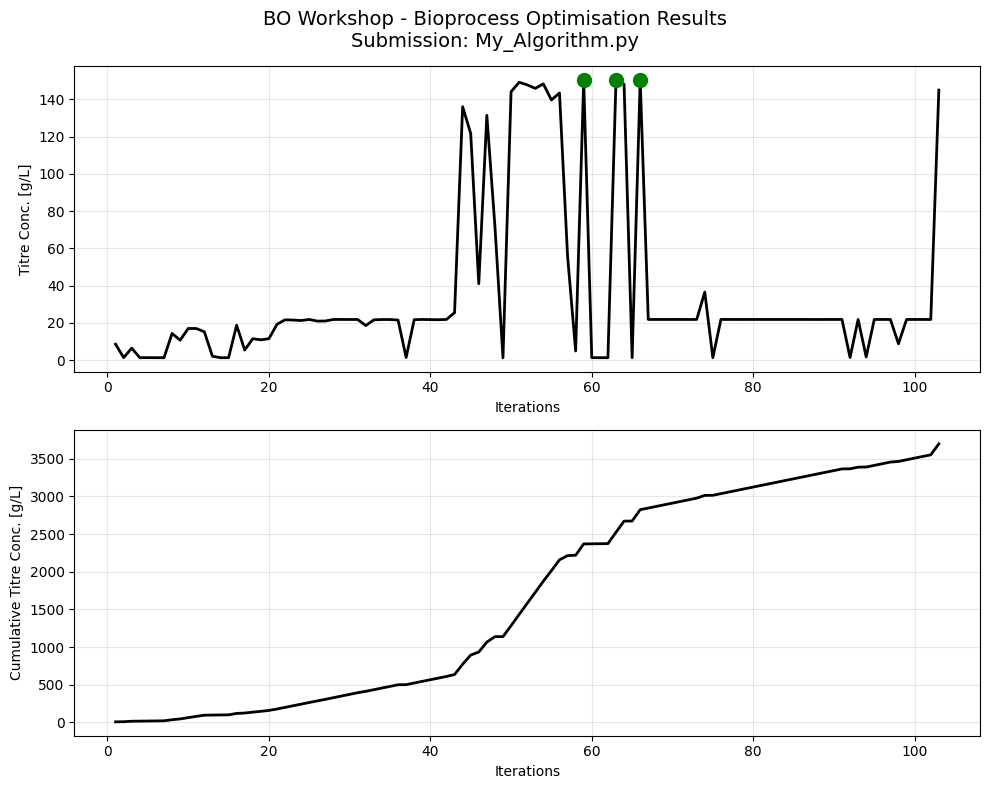

In [177]:
import numpy as np
import random
import torch
import gpytorch
import matplotlib.pyplot as plt
from botorch.models import SingleTaskGP
from botorch.models.transforms import Normalize
from botorch import fit_gpytorch_mll
from gpytorch.mlls import ExactMarginalLogLikelihood
from scipy.stats import norm

# ==========================================
# 1. THE GP CLASS (Gaussian Process Helper)
# ==========================================
class GP:
    def __init__(self, train_x, train_y):
        # Convert to tensor and ensure double precision
        self.train_x = torch.tensor(train_x).double()
        self.train_y = torch.tensor(train_y).double()
        if self.train_y.ndim == 1:
            self.train_y = self.train_y.unsqueeze(-1)

        # Standard SingleTaskGP with Input Normalization
        self.model = SingleTaskGP(
            self.train_x,
            self.train_y,
            input_transform=Normalize(d=self.train_x.shape[-1])
        )
        self.mll = ExactMarginalLogLikelihood(self.model.likelihood, self.model)

    def fit(self):
        fit_gpytorch_mll(self.mll)

    def predict(self, candidates):
        self.model.eval()
        candidate_tensor = torch.tensor(candidates).double()
        with torch.no_grad():
            posterior = self.model.posterior(candidate_tensor)
            mean = posterior.mean.squeeze().numpy()
            std = posterior.variance.sqrt().squeeze().numpy()
        return mean, std

# ==========================================
# 2. THE BO CLASS (The Optimization Engine)
# ==========================================
class BO:
    def __init__(self, bounds, budget=15000):
        self.X = []
        self.Y = []
        self.bounds = bounds
        self.budget = budget
        self.cost_map = {0: 10, 1: 575, 2: 2100}

        # --- STATE VARIABLES ---
        self.best_scout_score = -np.inf  # Highest result seen on Fidelity 0
        self.scout_patience = 0          # Counter for consecutive failures
        self.forced_fid1_done = False    # Flag for the Pre-Finale Trigger

    def run_initial_warmup(self, n_points=20):
        """
        Hybrid Warmup: 20 Cheap Scouts to map the space + 1 Quality Anchor
        to calibrate the scale of 'real' yields.
        """
        print(f"--- Starting Hybrid Warmup ({n_points} Cheap + 1 Anchor) ---")

        # 1. Run Cheap Scouts (Fidelity 0)
        for i in range(n_points):
            x_random = [
                random.uniform(self.bounds[0,0], self.bounds[0,1]),
                random.uniform(self.bounds[1,0], self.bounds[1,1]),
                random.uniform(self.bounds[2,0], self.bounds[2,1]),
                random.uniform(self.bounds[3,0], self.bounds[3,1]),
                random.uniform(self.bounds[4,0], self.bounds[4,1]),
                0.0
            ]
            y_result = conduct_experiment([x_random])[0]
            self.update_data(x_random, y_result)

        # 2. Run ONE Quality Anchor (Fidelity 1)
        print("   [Warmup Anchor] Running 1 Random Fidelity 1 Point...")
        x_anchor = [
            random.uniform(self.bounds[0,0], self.bounds[0,1]),
            random.uniform(self.bounds[1,0], self.bounds[1,1]),
            random.uniform(self.bounds[2,0], self.bounds[2,1]),
            random.uniform(self.bounds[3,0], self.bounds[3,1]),
            random.uniform(self.bounds[4,0], self.bounds[4,1]),
            1.0
        ]
        y_anchor = conduct_experiment([x_anchor])[0]
        self.update_data(x_anchor, y_anchor)

    def update_data(self, x_new, y_new):
        """ Updates internal data, manages budget, and tracks momentum. """
        if isinstance(x_new, np.ndarray): x_new = x_new.tolist()
        self.X.append(x_new)
        self.Y.append(-1 * y_new) # Store as negative for minimization

        fidelity = int(x_new[-1])
        cost = self.cost_map[fidelity]
        self.budget -= cost

        exp_id = len(self.X)
        print(f"   [Exp #{exp_id}] Ran Fidelity {fidelity} (Cost: {cost}). Result: {y_new:.4f} g/L. Budget Left: {self.budget}.")

        # --- MOMENTUM LOGIC ---
        if fidelity == 0:
            if y_new > self.best_scout_score:
                self.best_scout_score = y_new
                self.scout_patience = 0 # Reset: We are making progress
            else:
                self.scout_patience += 1 # Increment: We are stuck

        elif fidelity == 1:
            # If Fid 1 finds a Monster Result (>100), keep Momentum high
            # This allows the AI to stay on Fidelity 1 to map the peak
            if y_new > 100.0:
                print(f"   >>> MOMENTUM: Excellent result ({y_new:.2f})! Staying on High Quality Scan.")
                self.scout_patience = 10
            else:
                self.scout_patience = 0 # Reset to cheap scouting

        elif fidelity == 2:
            self.scout_patience = 0

    def MF_expected_improvement(self, gp_model, n_candidates=5000):
        """
        Upgraded Acquisition Function:
        Uses a mix of Global Random Search (Exploration) and
        Local Evolutionary Mutation (Exploitation) to find better peaks.
        """

        # 1. GENERATE CANDIDATES (The "Smart" Mix)
        # ---------------------------------------------------------
        candidates_list = []

        # A. Global Randomness (90% of candidates)
        # Keeps searching the unknown corners of the map
        n_global = int(n_candidates * 0.90)

        for _ in range(n_global):
            # Generate random 5D point
            cand = [random.uniform(self.bounds[d,0], self.bounds[d,1]) for d in range(5)]
            # Append Random Fidelity (0, 1, or 2)
            cand.append(float(random.randint(0, 2)))
            candidates_list.append(cand)

        # B. Local Mutation (10% of candidates)
        # Takes our Top 10 best points and adds small jitters to them.
        n_local = n_candidates - n_global

        # Get Top 10 best points found so far
        if len(self.Y) > 0:
            # Sort by Y (minimize negative = best)
            top_indices = np.argsort(self.Y)[:10]
            top_X = [self.X[i] for i in top_indices]

            for _ in range(n_local):
                # Pick a random "parent" from top 10
                parent = random.choice(top_X)
                child = list(parent) # Create a copy

                # Mutate: Add small noise to parameters (e.g. +/- 5% of range)
                for d in range(5):
                    low, high = self.bounds[d, 0], self.bounds[d, 1]
                    span = high - low
                    sigma = span * 0.05

                    # Use random.gauss instead of np.random.normal
                    mutation = random.gauss(0, sigma)
                    new_val = child[d] + mutation

                    # Manual Clip to stay within bounds
                    if new_val < low: new_val = low
                    if new_val > high: new_val = high
                    child[d] = new_val

                # Assign Random Fidelity for the child
                child[-1] = float(random.randint(0, 2))
                candidates_list.append(child)
        else:
            # Fallback if no data yet: Just generate more global randoms
            for _ in range(n_local):
                cand = [random.uniform(self.bounds[d,0], self.bounds[d,1]) for d in range(5)]
                cand.append(float(random.randint(0, 2)))
                candidates_list.append(cand)

        # Convert to NumPy array for GP processing
        candidates = np.array(candidates_list)
        # ---------------------------------------------------------

        # 2. STANDARD PREDICTION & EI CALCULATION
        mean, std = gp_model.predict(candidates)

        best_f = np.min(self.Y)
        xi = 0.15 # Aggressive Curiosity

        with np.errstate(divide='warn'):
            imp = best_f - mean - xi
            Z = imp / std
            ei = imp * norm.cdf(Z) + std * norm.pdf(Z)
            ei[std == 0.0] = 0.0

        # Cost Scaling
        costs = np.array([self.cost_map[int(f)] for f in candidates[:, -1]])
        score = ei / np.power(costs, 1)

        return candidates[np.argmax(score)]

    def optimize(self):
        self.run_initial_warmup()

        while self.budget > 10:
            # ============================================================
            # THE "FUNNEL" FINALE
            # Strategy: Top 3 -> Fidelity 1 -> Winner -> Fidelity 2
            # ============================================================
            if self.budget < 2690:
                print("\n!!! ENTERING 2-STAGE FINALE (3x Fid 1 -> 1x Fid 2) !!!")
                sorted_indices = np.argsort(self.Y)
                semi_finalists = []
                candidates_processed = 0

                # --- STAGE 1: SEMI-FINALS (Verification at Fid 1) ---
                for idx in sorted_indices:
                    if candidates_processed >= 3: break

                    candidate = list(self.X[idx])
                    current_fid = int(candidate[-1])
                    current_score = -1 * self.Y[idx]

                    if current_fid == 0:
                        # Upgrade Cheap candidates to Fidelity 1
                        if self.budget >= 2675:
                            print(f"   > Semi-Final #{candidates_processed+1}: Upgrading Rank #{candidates_processed+1} to Fidelity 1...")
                            candidate[-1] = 1.0
                            y_res = conduct_experiment([candidate])[0]
                            self.update_data(candidate, y_res)
                            semi_finalists.append({'score': y_res, 'params': candidate})
                            candidates_processed += 1
                    else:
                        # Pass existing High Quality candidates through
                        print(f"   > Semi-Final #{candidates_processed+1}: Already High Quality ({current_score:.2f}). Passing through.")
                        semi_finalists.append({'score': current_score, 'params': candidate})
                        candidates_processed += 1

                # --- STAGE 2: GRAND FINAL (Champion at Fid 2) ---
                if semi_finalists:
                    semi_finalists.sort(key=lambda x: x['score'], reverse=True)
                    champion = semi_finalists[0]
                    print(f"   >>> SEMI-FINAL WINNER: {champion['score']:.4f} g/L. Advancing to Final Verification!")

                    if self.budget >= 2100:
                        final_candidate = champion['params']
                        if final_candidate[-1] != 2.0:
                            final_candidate[-1] = 2.0
                            print(f"   > 🏆 GRAND FINAL: Verifying Champion at Fidelity 2...")
                            y_final = conduct_experiment([final_candidate])[0]
                            self.update_data(final_candidate, y_final)
                break

            # --- REGULAR OPTIMIZATION LOOP ---
            gp = GP(self.X, self.Y)
            gp.fit()
            x_next = self.MF_expected_improvement(gp)

            # 1. HARD BAN ON FIDELITY 2 (Save it for the Finale)
            if x_next[-1] == 2.0: x_next[-1] = 1.0

            # 2. PRE-FINALE TRIGGER (One last refinement scan)
            if self.budget <= 3300 and not self.forced_fid1_done:
                x_next[-1] = 1.0
                self.forced_fid1_done = True

            # 3. DUPLICATE KICKER (Smart Version)
            is_duplicate = False
            x_next_params = np.array(x_next[:-1])
            for past_x in self.X:
                if np.linalg.norm(x_next_params - np.array(past_x[:-1])) < 0.5:
                    is_duplicate = True; break

            if is_duplicate:
                # We still use patience here to decide KICK strength
                kick_fid = 1.0 if self.scout_patience >= 1 else 0.0
                x_next = [random.uniform(b[0], b[1]) for b in self.bounds]
                x_next[-1] = kick_fid

            # 4. BUDGET SAFETY
            cost = self.cost_map[int(x_next[-1])]
            if self.budget - cost < 2690:
                x_next[-1] = 0.0
                cost = 10

            if cost > self.budget: break

            y_next = conduct_experiment([x_next])[0]
            self.update_data(x_next, y_next)

# ==========================================
# 3. EXECUTION BLOCK (Multi-Start Strategy)
# ==========================================
X_searchspace = np.array([[30, 40], [6, 8], [0, 50], [0, 50], [0, 50], [0, 2]])

BO_m = BO(X_searchspace, budget=15000)
BO_m.optimize()

# --- FINAL REPORT ---
print("\n" + "="*40)
print("       OPTIMIZATION REPORT       ")
print("="*40)

# 1. Separate results by Fidelity
results = []
for x, y in zip(BO_m.X, BO_m.Y):
    # Remember: y is stored as negative, so flip it back
    results.append({'fidelity': int(x[-1]), 'titre': -1 * y})

# 2. Extract Values
fid0_values = [r['titre'] for r in results if r['fidelity'] == 0]
fid1_values = [r['titre'] for r in results if r['fidelity'] == 1]
fid2_values = [r['titre'] for r in results if r['fidelity'] == 2]

# 3. Calculate Stats (Best & Mean)
best_fid0 = max(fid0_values) if fid0_values else 0.0
mean_fid0 = np.mean(fid0_values) if fid0_values else 0.0

best_fid1 = max(fid1_values) if fid1_values else 0.0
mean_fid1 = np.mean(fid1_values) if fid1_values else 0.0

best_fid2 = max(fid2_values) if fid2_values else 0.0
mean_fid2 = np.mean(fid2_values) if fid2_values else 0.0

print(f"Total Experiments:   {len(results)}")
print(f" - Low Fid (0): {len(fid0_values)} runs")
print(f" - Mid Fid (1): {len(fid1_values)} runs")
print(f" - High Fid (2):{len(fid2_values)} runs")
print("-" * 40)
print(f"Fidelity 0 (Cheap):")
print(f"  > Best: {best_fid0:.4f} g/L")
print(f"  > Mean: {mean_fid0:.4f} g/L")
print("-" * 40)
print(f"Fidelity 1 (Quality):")
print(f"  > Best: {best_fid1:.4f} g/L")
print(f"  > Mean: {mean_fid1:.4f} g/L")
print("-" * 40)
print(f"🏆 BEST RESULT (Fid 2): {best_fid2:.4f} g/L")
print("="*40)

# ==========================================
# 4. VISUALIZATION
# ==========================================
# Prepare Data
my_titres = [-1 * y for y in BO_m.Y]
my_iterations = range(1, len(my_titres) + 1)
my_cumulative = np.cumsum(my_titres)
my_max_titre = max([-1 * y for x, y in zip(BO_m.X, BO_m.Y) if x[-1] == 2])

# Plot
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig1.suptitle(f'BO Workshop - Bioprocess Optimisation Results\nSubmission: My_Algorithm.py', fontsize=14)

# Top Plot: Titre per Iteration
ax1.plot(my_iterations, my_titres, color='black', linewidth=2, label='My Algorithm')

# Highlight Top 3
top_3_idx = np.argsort(my_titres)[-3:]
ax1.scatter([my_iterations[i] for i in top_3_idx],
            [my_titres[i] for i in top_3_idx],
            color='green', s=100, zorder=5)
ax1.set_ylabel('Titre Conc. [g/L]')
ax1.set_xlabel('Iterations')
ax1.grid(True, alpha=0.3)

# Bottom Plot: Cumulative Sum
ax2.plot(my_iterations, my_cumulative, color='black', linewidth=2)
ax2.set_ylabel('Cumulative Titre Conc. [g/L]')
ax2.set_xlabel('Iterations')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()